In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [ ]:
#Importing Data
df=pd.read_excel("/content/tarp.xlsx") 
df.head()

,Temperature ( C ),Humidity (%),Soil Moisture (%),Sufficient Water
0,36,76,81,1
1,40,85,70,0
2,39,73,72,1
3,41,79,71,1
4,44,73,65,0


In [ ]:
#Getting data information to find any null values and any non-numerical attributes with rows and cols info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Temperature ( C )  200 non-null    int64
 1   Humidity (%)       200 non-null    int64
 2   Soil Moisture (%)  200 non-null    int64
 3   Sufficient Water   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
# Describing all the statistical paramters of different columns
df.describe()

,Temperature ( C ),Humidity (%),Soil Moisture (%),Sufficient Water
count,200.0000,200.000000,200.000000,200.000000
mean,41.4050,77.225000,57.375000,0.370000
std,6.1121,9.048966,12.933319,0.484016
min,29.0000,62.000000,35.000000,0.000000
25%,36.0000,69.000000,46.000000,0.000000
50%,42.0000,78.000000,58.000000,0.000000
75%,47.0000,85.000000,68.000000,1.000000
max,53.0000,93.000000,81.000000,1.000000


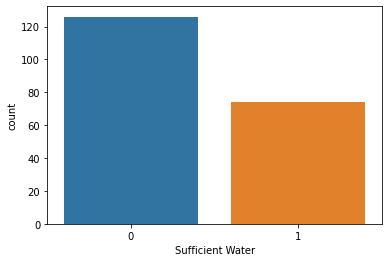

In [ ]:
sns.countplot(data = df, x = 'Sufficient Water')

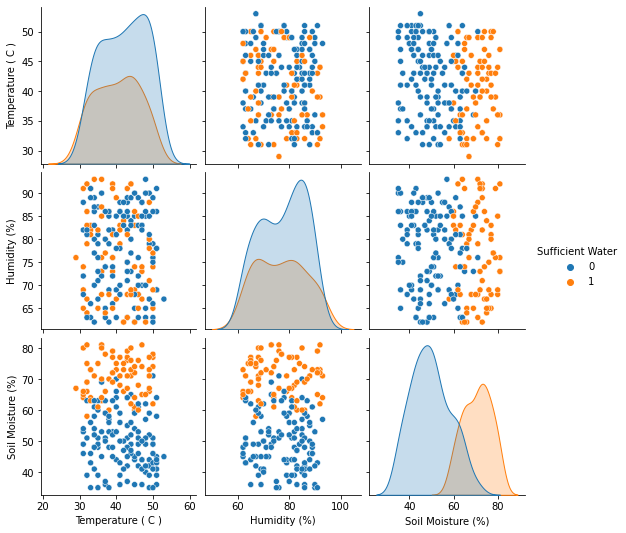

In [ ]:
sns.pairplot(df,hue='Sufficient Water')

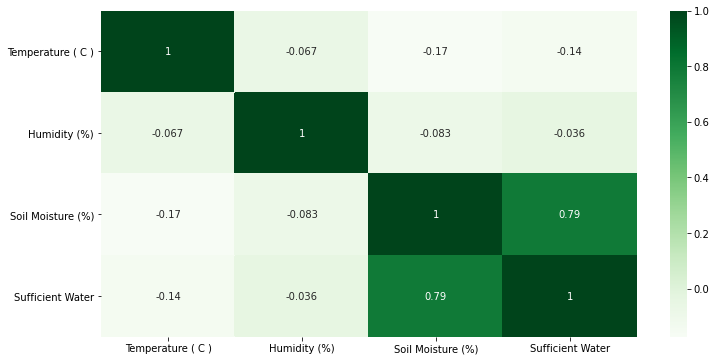

In [ ]:
corr=df.corr()
plt.subplots(figsize=(12,6)) 
fig = sns.heatmap(corr,cmap='Greens', annot=True)

In [ ]:
#Splitting data into attributes and labels and fixing our X and y
X=df.iloc[:,:-1].values 
y=df.iloc[:,-1].values

In [ ]:
#Scaling data to handle high variances 
scaler = StandardScaler() 
X = scaler.fit_transform(X)

In [ ]:
#Splitting X and y into train and test sets 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
#Importing Metrics for Evaluation 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score 
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error 
from sklearn.model_selection import GridSearchCV

**Running The Classification algorithm**

**Using K nearest Neighbour Algorithm with K=1**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
print(accuracy_score(y_test,pred1))

[[28  7]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.73      0.76      0.75        25

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

0.7833333333333333


**Best K value**

In [ ]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

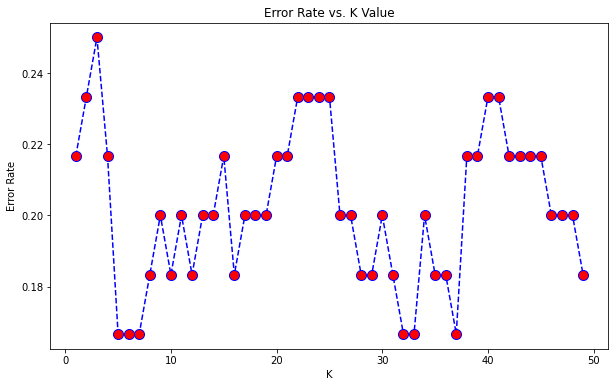

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We get that the best K value with least error rate around 6-8

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[29  6]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.78      0.84      0.81        25

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

0.8333333333333334


Using random forest classifier with default parameters

In [ ]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
# getting all the best parameters to perform parametric tuning
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
#Defining parameters to be tuned 
param={ 'n_estimators':[i for i in range(1,100)], 'max_features':['sqrt','log2'], 'criterion':['gini','entropy'], }
#Using Gridsearch to find best values of parameters
grid = GridSearchCV(estimator=rfc, param_grid=param) 
grid.fit(X_train, y_train) 
grid.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 14}

This step took around 3 mins as it is just going through all the values of parameters executing every possible version

In [ ]:
#Creating Optimal Random Forest Classifier with best possible paramters
rfc = RandomForestClassifier(n_estimators = 14,max_features= 'sqrt', criterion = 'gini', random_state = 101) 
#Training classifier
rfc.fit(X_train, y_train)
#Generating predicted values 
y_pred = rfc.predict(X_test)

In [ ]:
#Getting Metrics 
print('Accuracy Score on train = ',accuracy_score(y_train,rfc.predict(X_train)))
print('Accuracy Score on test = ',accuracy_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred)) 
print('Mean Squared Error',mean_squared_error(y_test,y_pred)) 
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred)) 
print('Classification Report',classification_report(y_test, y_pred))

Accuracy Score on train =  0.9857142857142858
Accuracy Score on test =  0.8333333333333334
Mean Absolute Error 0.16666666666666666
Mean Squared Error 0.16666666666666666
Confusion Matrix:
 [[29  6]
 [ 4 21]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.78      0.84      0.81        25

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

